# AFRICAN STARTUPS' FUNDING

We are going to use an African startup dataset in an attempt to answer question(s) about African Startups.

**Importing important libraries for numeric manipulation and data viz**

**Install Black for code formatting**

In [3]:
!pip install black[jupyter]

In [4]:
!pip install sketch

In [46]:
#import all the important libraries
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sketch

**Loading the dataset, it is a .xlsx file**

In [6]:
#file location 
african_startups = r"C:\Users\user\Downloads\AfricanStartups\2021\Funded African tech startups 2021.xlsx"
#read and assign the xlsx to a df
df = pd.read_excel(african_startups)

In [7]:
#view df
df.head()

,Startup,Unnamed: 1,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
0,Daystar Power,NaN,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,No,Yes,Yes,2017.0,No,71.0
1,uLesson,NaN,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,No,Yes,No,2019.0,No,83.0
2,Cowrywise,NaN,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,No,Yes,No,2017.0,Yes,96.0
3,Ogelle,NaN,Nigeria,entertainment,January,NaN,African Discovery Group,Undisclosed,Equity,No,Yes,No,2017.0,No,7.0
4,Contro,NaN,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,No,Yes,No,2020.0,No,9.0


Based on the initial inspection of the dataset, we need to drop the  **'Unnamed: 1'** column.

In [8]:
df = df.drop(['Unnamed: 1'], axis=1) #removing the unnamed column from above, it has empty values
df.head(5)

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
0,Daystar Power,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,No,Yes,Yes,2017.0,No,71.0
1,uLesson,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,No,Yes,No,2019.0,No,83.0
2,Cowrywise,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,No,Yes,No,2017.0,Yes,96.0
3,Ogelle,Nigeria,entertainment,January,NaN,African Discovery Group,Undisclosed,Equity,No,Yes,No,2017.0,No,7.0
4,Contro,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,No,Yes,No,2020.0,No,9.0


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup                 564 non-null    object 
 1   Location                564 non-null    object 
 2   Sector                  564 non-null    object 
 3   Date                    457 non-null    object 
 4   Amount (US$)            310 non-null    float64
 5   Investors               545 non-null    object 
 6   Stage                   564 non-null    object 
 7   Debt/Equity             564 non-null    object 
 8   Female co-founder/CEO?  564 non-null    object 
 9   Local founder?          564 non-null    object 
 10  Intnl founder?          564 non-null    object 
 11  Launched?               564 non-null    float64
 12  Accelerator?            564 non-null    object 
 13  Employees               565 non-null    float64
dtypes: float64(3), object(11)
memory usage: 

Lets check the tail of this dataset

In [10]:
df.tail()

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


We have around 564 Non-null values for 1173 rows. We can assume that after row 564, we have NULL value. We'll have to investigate this. 

In [11]:
df.iloc[[560,561,562,563,564,565,566,567]]

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
560,OKO Finance,Mali,fintech,April,1200000.0,"Newfund, ResiliAnce, Mercy Corps Ventures, Tec...",Seed,Equity,No,No,Yes,2017.0,Yes,12.0
561,alsoug,Sudan,e-commerce,October,5000000.0,"Fawry, Rally Cap Ventures, Musha Ventures, others",Series A,Equity,Yes,Yes,No,2016.0,No,11.0
562,Ramani,Tanzania,retail-tech,NaN,NaN,"Launch Africa Ventures, Musha Ventures",Undisclosed,Equity,No,Yes,No,2019.0,Yes,55.0
563,Gozem,Togo,transport,October,5000000.0,"AAIC, Thunes (TransferTo), Momentum Ventures (...",Series A,Equity,No,Yes,No,2018.0,No,114.0
564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above dataset proves our earlier suspicion that our data has **564** rows instead of the **1173** rows.

**We need to select a subset of ROWS from 0-563** before we continue..

### subset with 564 rows

In [12]:
subset_df = df.iloc[0:564] #the range is not inclusive of the 564th row.
subset_df.tail() #checking if the last row has Nulls or not

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
559,AlphaDirect,Botswana,fintech,April,600000.0,"Launch Africa Ventures, Century Oak Capital, a...",Pre-Series A,Equity,No,No,Yes,2015.0,No,4.0
560,OKO Finance,Mali,fintech,April,1200000.0,"Newfund, ResiliAnce, Mercy Corps Ventures, Tec...",Seed,Equity,No,No,Yes,2017.0,Yes,12.0
561,alsoug,Sudan,e-commerce,October,5000000.0,"Fawry, Rally Cap Ventures, Musha Ventures, others",Series A,Equity,Yes,Yes,No,2016.0,No,11.0
562,Ramani,Tanzania,retail-tech,NaN,NaN,"Launch Africa Ventures, Musha Ventures",Undisclosed,Equity,No,Yes,No,2019.0,Yes,55.0
563,Gozem,Togo,transport,October,5000000.0,"AAIC, Thunes (TransferTo), Momentum Ventures (...",Series A,Equity,No,Yes,No,2018.0,No,114.0


#### Checking for nulls again

In [13]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup                 564 non-null    object 
 1   Location                564 non-null    object 
 2   Sector                  564 non-null    object 
 3   Date                    457 non-null    object 
 4   Amount (US$)            310 non-null    float64
 5   Investors               545 non-null    object 
 6   Stage                   564 non-null    object 
 7   Debt/Equity             564 non-null    object 
 8   Female co-founder/CEO?  564 non-null    object 
 9   Local founder?          564 non-null    object 
 10  Intnl founder?          564 non-null    object 
 11  Launched?               564 non-null    float64
 12  Accelerator?            564 non-null    object 
 13  Employees               564 non-null    float64
dtypes: float64(3), object(11)
memory usage: 61

columns with missing valies are date, amount, inventors

**Lets investigate**

In [14]:
subset_df.head(10)

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
0,Daystar Power,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,No,Yes,Yes,2017.0,No,71.0
1,uLesson,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,No,Yes,No,2019.0,No,83.0
2,Cowrywise,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,No,Yes,No,2017.0,Yes,96.0
3,Ogelle,Nigeria,entertainment,January,NaN,African Discovery Group,Undisclosed,Equity,No,Yes,No,2017.0,No,7.0
4,Contro,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,No,Yes,No,2020.0,No,9.0
5,Xend,Nigeria,fintech,February,500000.0,"NGC Ventures, Hashkey",Undisclosed (strategic),Equity,No,Yes,No,2019.0,Yes,68.0
6,Oneport 365,Nigeria,logistics,February,NaN,CcHub Syndicate,Undisclosed,Equity,No,Yes,No,2019.0,No,17.0
7,Tǽillὸ,Nigeria,e-commerce,February,NaN,CcHub Syndicate,Undisclosed,Equity,Yes,Yes,No,2018.0,Yes,12.0
8,ImaliPay,Nigeria,fintech,February,NaN,"TEN13, FINCA Ventures, Optimiser Foundation, M...",Pre-seed,Equity,No,Yes,No,2020.0,No,7.0
9,Get It Done Now,Nigeria,e-commerce,February,NaN,NaN,Undisclosed,Equity,No,Yes,Yes,2018.0,No,4.0


Most of the null values in the amount column, they're undisclosed amount. Should I just replace them with **ZEROs**

In [15]:
subset_df['Amount (US$)'].isnull().sum() # we should fill this with Zeros and how many of these are undisclosed

254

In [16]:
subset_df['Stage'].value_counts()

Stage
Undisclosed                               236
Seed                                      123
Pre-seed                                   96
Series A                                   41
Pre-Series A                               21
Undisclosed                                16
Series B                                   11
Series C                                    3
Pre-Series B                                2
Bridge                                      2
Seed + Pre-Series A                         1
Pe-seed                                     1
Strategic                                   1
Seed / Pre-Series A                         1
Series A                                    1
Pre-seed / Seed                             1
Pre-Series C                                1
Seed/bridge                                 1
Series A / Series B                         1
Seed / Series A                             1
Series A / B                                1
Undisclosed (strategic)     

I somewhat went of on a tangent investigate how many startup disclose their stage of investment and is it equal to the number of Nulls value. Found that it is not the same but rather close.

## AMOUNT (US) COLUMN

#### fill the NaN with zeros.

In [17]:
subset_df['Amount (US$)'].fillna(0, inplace=True) #replacing the NaN with Zeros, had to use the INPLACE = TRUE didnt work without it

C:\Users\user\AppData\Local\Temp\ipykernel_37204\854645118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Amount (US$)'].fillna(0, inplace=True) #replacing the NaN with Zeros, had to use the INPLACE = TRUE didnt work without it


In [18]:
subset_df.head()

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
0,Daystar Power,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,No,Yes,Yes,2017.0,No,71.0
1,uLesson,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,No,Yes,No,2019.0,No,83.0
2,Cowrywise,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,No,Yes,No,2017.0,Yes,96.0
3,Ogelle,Nigeria,entertainment,January,0.0,African Discovery Group,Undisclosed,Equity,No,Yes,No,2017.0,No,7.0
4,Contro,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,No,Yes,No,2020.0,No,9.0


In [19]:
#investigate NaN values in the column
subset_df['Amount (US$)'].isnull().sum() # we have removed all nulls

0

### THE investor column

In [20]:
subset_df['Investors'].head()

0    Investment Fund for Developing Countries (IFU)...
1    Owl Ventures, TLcom Capital, Founder Collectiv...
2    Quona Capital, Sahil Lavingia, Tsadik Foundati...
3                              African Discovery Group
4                                                  NaN
Name: Investors, dtype: object

I want to split the investor column into multiple columns.

In [21]:
investor_df = subset_df['Investors'].str.split(',', expand=True)

In [22]:
investor_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Investment Fund for Developing Countries (IFU),STOA,Proparco,Morgan Stanley Investment Management,DEG (January),IFC (July),Trine,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Owl Ventures,TLcom Capital,Founder Collective,LocalGlobe,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Quona Capital,Sahil Lavingia,Tsadik Foundation,angels,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,African Discovery Group,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
investor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       545 non-null    object
 1   1       272 non-null    object
 2   2       190 non-null    object
 3   3       140 non-null    object
 4   4       105 non-null    object
 5   5       78 non-null     object
 6   6       58 non-null     object
 7   7       41 non-null     object
 8   8       34 non-null     object
 9   9       27 non-null     object
 10  10      21 non-null     object
 11  11      16 non-null     object
 12  12      13 non-null     object
 13  13      10 non-null     object
 14  14      8 non-null      object
 15  15      7 non-null      object
 16  16      5 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      2 non-null      object
 20  20      2 non-null      object
 21  21      2 non-null      object
 22  22      1 non-null      ob

Splitting the investor column will complicate things. An alternative is to count the number of investors.

#### OPTION 2: 

In [24]:
subset_df['Investors_no'] = subset_df['Investors'].str.count(',') + 1 #the +1 is because py indexes from 0

C:\Users\user\AppData\Local\Temp\ipykernel_37204\3012905817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Investors_no'] = subset_df['Investors'].str.count(',') + 1 #the +1 is because py indexes from 0


In [25]:
subset_df.head()

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees,Investors_no
0,Daystar Power,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,No,Yes,Yes,2017.0,No,71.0,7.0
1,uLesson,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,No,Yes,No,2019.0,No,83.0,4.0
2,Cowrywise,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,No,Yes,No,2017.0,Yes,96.0,4.0
3,Ogelle,Nigeria,entertainment,January,0.0,African Discovery Group,Undisclosed,Equity,No,Yes,No,2017.0,No,7.0,1.0
4,Contro,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,No,Yes,No,2020.0,No,9.0,NaN


### changing the datatype to int
#### launched? column

In [26]:
subset_df['Launched?'] = subset_df['Launched?'].astype(int) #converting the Launched column to an int
subset_df['Employees'] = subset_df['Employees'].astype(int)#employees column
subset_df['Investors_no'].fillna(0, inplace=True)
subset_df['Investors_no'] = subset_df['Investors_no'].astype(int) #number of investors

C:\Users\user\AppData\Local\Temp\ipykernel_37204\2191712135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Launched?'] = subset_df['Launched?'].astype(int) #converting the Launched column to an int
C:\Users\user\AppData\Local\Temp\ipykernel_37204\2191712135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Employees'] = subset_df['Employees'].astype(int)#employees column
C:\Users\user\AppData\Local\Temp\ipykernel_37204\2191712135.py:3: SettingWithCopyWarning: 
A value is trying 

In [27]:
subset_df.head()

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees,Investors_no
0,Daystar Power,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,No,Yes,Yes,2017,No,71,7
1,uLesson,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,No,Yes,No,2019,No,83,4
2,Cowrywise,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,No,Yes,No,2017,Yes,96,4
3,Ogelle,Nigeria,entertainment,January,0.0,African Discovery Group,Undisclosed,Equity,No,Yes,No,2017,No,7,1
4,Contro,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,No,Yes,No,2020,No,9,0


In [28]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup                 564 non-null    object 
 1   Location                564 non-null    object 
 2   Sector                  564 non-null    object 
 3   Date                    457 non-null    object 
 4   Amount (US$)            564 non-null    float64
 5   Investors               545 non-null    object 
 6   Stage                   564 non-null    object 
 7   Debt/Equity             564 non-null    object 
 8   Female co-founder/CEO?  564 non-null    object 
 9   Local founder?          564 non-null    object 
 10  Intnl founder?          564 non-null    object 
 11  Launched?               564 non-null    int32  
 12  Accelerator?            564 non-null    object 
 13  Employees               564 non-null    int32  
 14  Investors_no            564 non-null    in

In [29]:
import pandas as pd
import re

# Assuming you have already loaded your DataFrame
# df = pd.read_csv('investors.csv')  # Load your data here

# Define a function to split the investor string into a list of individual investors
def split_investors(investor_string):
    if isinstance(investor_string, str):
        return re.split(r',\s*', investor_string)
    else:
        # Handle non-string data here, for example, return an empty list
        return []

# Apply the function to the entire 'Investors' column and create a new column 'Individual_Investors'
subset_df['Individual_Investors'] = subset_df['Investors'].apply(split_investors)

# Display the DataFrame with the new column
# print(df)


C:\Users\user\AppData\Local\Temp\ipykernel_37204\1194123077.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Individual_Investors'] = subset_df['Investors'].apply(split_investors)


In [30]:
subset_df['Individual_Investors']

0      [Investment Fund for Developing Countries (IFU...
1      [Owl Ventures, TLcom Capital, Founder Collecti...
2      [Quona Capital, Sahil Lavingia, Tsadik Foundat...
3                              [African Discovery Group]
4                                                     []
                             ...                        
559    [Launch Africa Ventures, Century Oak Capital, ...
560    [Newfund, ResiliAnce, Mercy Corps Ventures, Te...
561    [Fawry, Rally Cap Ventures, Musha Ventures, ot...
562             [Launch Africa Ventures, Musha Ventures]
563    [AAIC, Thunes (TransferTo), Momentum Ventures ...
Name: Individual_Investors, Length: 564, dtype: object

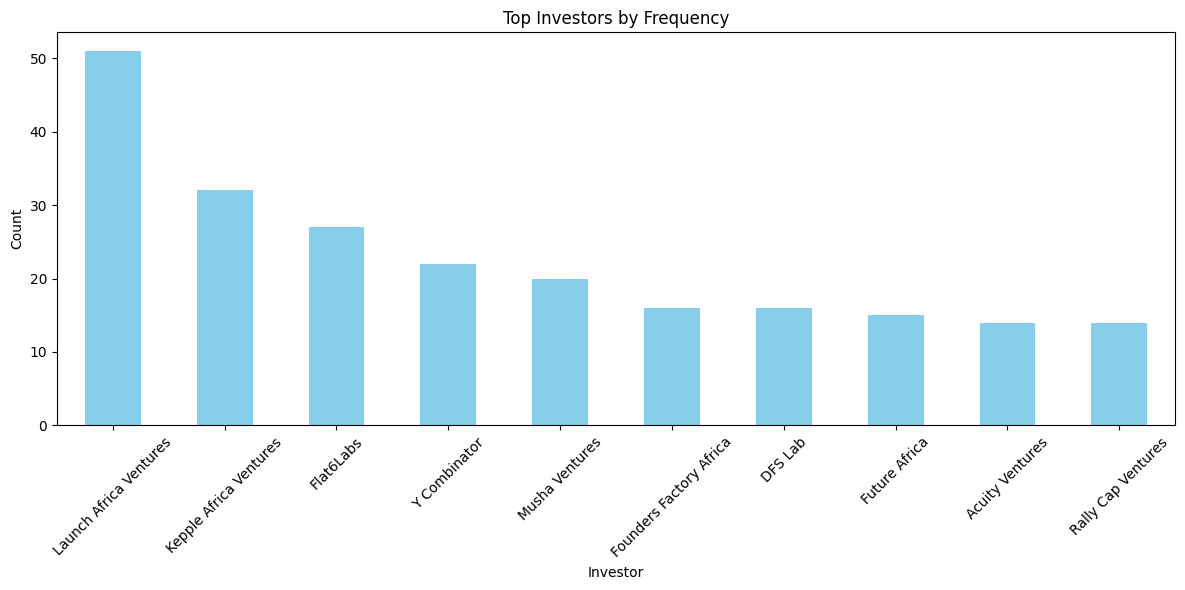

In [31]:
import pandas as pd
import re
import matplotlib.pyplot as plt


# Flatten the list of individual investors across all rows
all_investors = [investor for sublist in subset_df['Individual_Investors'] for investor in sublist]

# Count the frequency of each individual investor
investor_counts = pd.Series(all_investors).value_counts()

# Create a bar graph to visualize the top investors by frequency (e.g., top 10)
top_investors = investor_counts.head(10)  # Adjust the number as needed

plt.figure(figsize=(12, 6))
top_investors.plot(kind='bar', color='skyblue')
plt.title('Top Investors by Frequency')
plt.xlabel('Investor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
subset_df['Female co-founder/CEO?'].unique()

array(['No', 'Yes', 'No '], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_37204\2087017668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Female co-founder/CEO?'] = subset_df['Female co-founder/CEO?'].str.strip().str.lower()


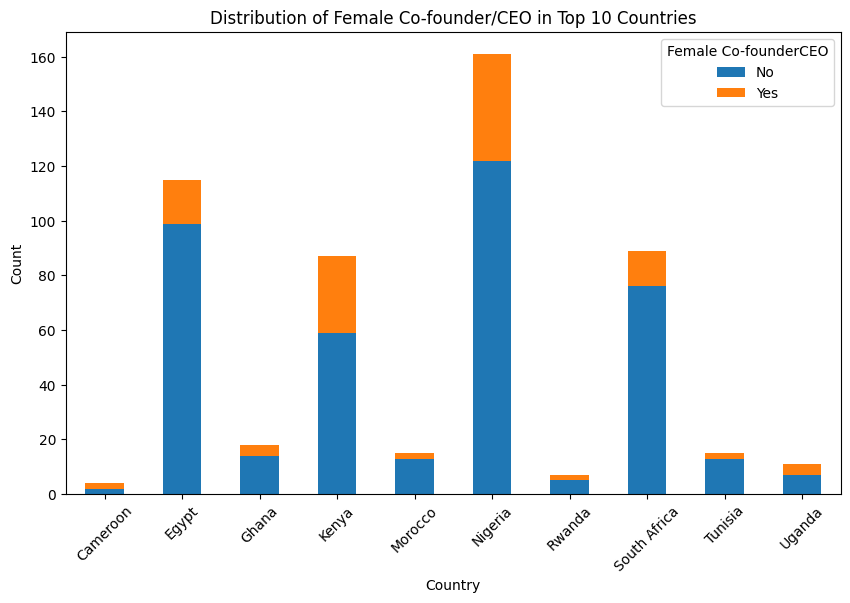

In [33]:
# Clean and standardize the 'female co-founderCEO (Yes or No)' column
subset_df['Female co-founder/CEO?'] = subset_df['Female co-founder/CEO?'].str.strip().str.lower()

# Group the data by 'country' and count the occurrences of 'yes' and 'no' for female co-founderCEO
grouped_data = subset_df.groupby(['Location', 'Female co-founder/CEO?']).size().unstack().fillna(0)

top_10_countries = grouped_data['yes'].nlargest(10)

# Filter the original DataFrame (subset_df) to include only the top 10 countries
top_10_df = subset_df[subset_df['Location'].isin(top_10_countries.index)]

# Group the data by 'Location' and count the occurrences of 'Yes' and 'No' for female co-founderCEO
grouped_data_top_10 = top_10_df.groupby(['Location', 'Female co-founder/CEO?']).size().unstack().fillna(0)

# Plot a stacked bar chart for the top 10 countries
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data_top_10.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of Female Co-founder/CEO in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Female Co-founderCEO', labels=['No', 'Yes'])
plt.show()

The insight I get from the image is that there is a significant gender disparity in the number of female co-founders in the top 10 African countries. The country with the highest percentage of female co-founders is Rwanda, with 17%, followed by South Africa with 15%. The countries with the lowest percentage of female co-founders are Nigeria and Egypt, with only 2% each.

There are a number of possible reasons for this disparity. One possibility is that there are cultural factors that discourage women from becoming entrepreneurs. For example, in some cultures, women are expected to focus on their families and homemaking, and are not seen as being as capable as men of starting and running businesses.

Another possibility is that there are financial barriers that make it difficult for women to start businesses. For example, women may have less access to capital than men, and may face higher interest rates on loans. They may also have less access to networks and mentors who can help them launch and grow their businesses.

Despite these challenges, there are a number of women in Africa who are successfully running businesses. These women are often trailblazers, breaking down barriers and paving the way for other women entrepreneurs. They are an inspiration to us all, and their stories show that anything is possible if you set your mind to it.

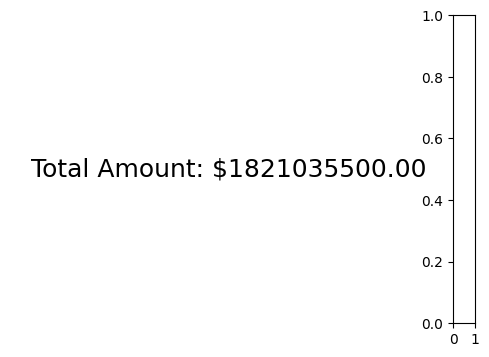

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Calculate the total amount
total_amount = subset_df['Amount (US$)'].sum()  # Replace this with your actual total amount

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Create a card-like display
ax.text(0.5, 0.5, f'Total Amount: ${total_amount:.2f}', ha='center', va='center', fontsize=18)
ax.axis('off')

# Adjust the color and style of the card
ax.set_facecolor('#f0f0f0')  # Background color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the figure
plt.show()

In [35]:
mode_value = subset_df['Date'].mode()[0]

# Replace NaN values with the mode
subset_df['Date'].fillna(mode_value, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_37204\335119605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Date'].fillna(mode_value, inplace=True)


In [36]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup                 564 non-null    object 
 1   Location                564 non-null    object 
 2   Sector                  564 non-null    object 
 3   Date                    564 non-null    object 
 4   Amount (US$)            564 non-null    float64
 5   Investors               545 non-null    object 
 6   Stage                   564 non-null    object 
 7   Debt/Equity             564 non-null    object 
 8   Female co-founder/CEO?  564 non-null    object 
 9   Local founder?          564 non-null    object 
 10  Intnl founder?          564 non-null    object 
 11  Launched?               564 non-null    int32  
 12  Accelerator?            564 non-null    object 
 13  Employees               564 non-null    int32  
 14  Investors_no            564 non-null    in

## TASK 1:What is the right time to seek funding?


In [37]:
subset_df['Date'].unique()

array(['January + July', 'January + December', 'January', 'February',
       'March', 'March + August', 'March + August + November',
       'April + November', 'April', 'May', 'May + October', 'June',
       'July', 'July + November', 'July + August ', 'August',
       'August + November', 'September', 'September + October', 'October',
       'November', 'November + December', 'December', 'January + August',
       'February + July', 'March + May', 'April + September',
       'July + September', 'January + additional round',
       'January + February', 'June + December',
       'July + August + November', 'February + October', 'April + August',
       'April + July', 'April +  October'], dtype=object)

In [38]:
date_mapping = {
    'January + July': 'January',
    'January + December': 'January',
    'January': 'January',
    'February': 'February',
    'March': 'March',
    'March + August': 'March',
    'March + August + November': 'March',
    'April + November': 'April',
    'April': 'April',
    'May': 'May',
    'May + October': 'May',
    'June': 'June',
    'July': 'July',
    'July + November': 'July',
    'July + August ': 'July',  # Note: Removed extra space
    'August': 'August',
    'August + November': 'August',
    'September': 'September',
    'September + October': 'September',
    'October': 'October',
    'November': 'November',
    'November + December': 'November',
    'December': 'December',
    'January + August': 'January',
    'February + July': 'February',
    'March + May': 'March',
    'April + September': 'April',
    'July + September': 'July',
    'January + additional round': 'January',
    'January + February': 'January',
    'June + December': 'June',
    'July + August + November': 'July',
    'February + October': 'February',
    'April + August': 'April',
    'April + July': 'April',
    'April +  October': 'April'
}

# Function to standardize the date
def standardize_date(date_string):
    # If the date string is in the mapping, return the standardized format
    if date_string in date_mapping:
        return date_mapping[date_string]
    else:
        # If not found in the mapping, you can handle other cases here
        # For example, you can return 'Unknown' or perform further analysis
        return 'Unknown'

# Apply the standardize_date function to create a new column
subset_df['Standardized_Date'] = subset_df['Date'].apply(standardize_date)

C:\Users\user\AppData\Local\Temp\ipykernel_37204\704909210.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Standardized_Date'] = subset_df['Date'].apply(standardize_date)


In [39]:
subset_df['Standardized_Date'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

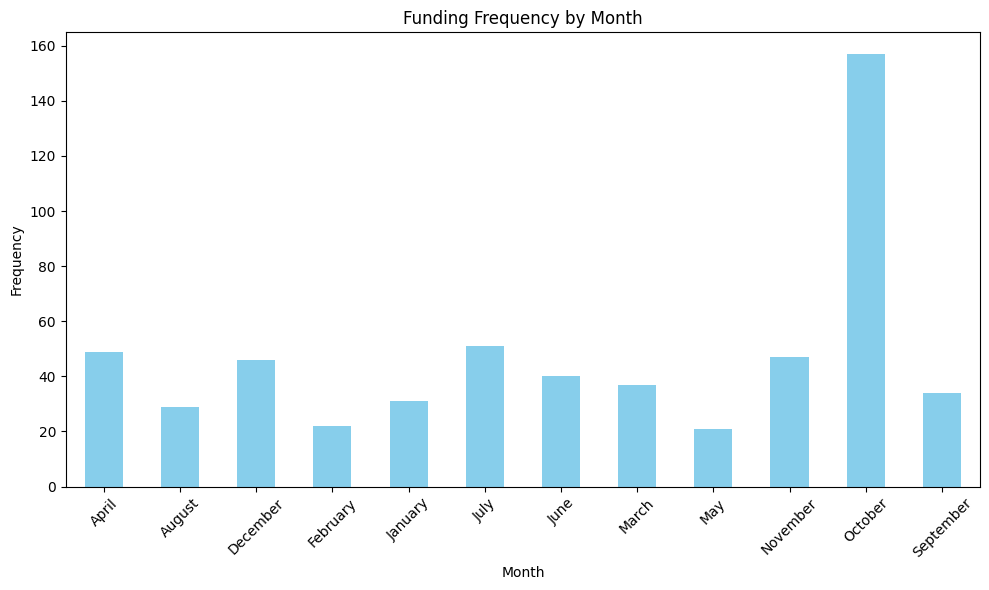

In [40]:
funding_by_month = subset_df['Standardized_Date'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
funding_by_month.plot(kind='bar', color='skyblue')
plt.title('Funding Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
subset_df.head()

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder/CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees,Investors_no,Individual_Investors,Standardized_Date
0,Daystar Power,Nigeria,energy,January + July,62000000.0,Investment Fund for Developing Countries (IFU)...,Series B,Equity/debt,no,Yes,Yes,2017,No,71,7,[Investment Fund for Developing Countries (IFU...,January
1,uLesson,Nigeria,ed-tech,January + December,22500000.0,"Owl Ventures, TLcom Capital, Founder Collectiv...",Series A / Series B,Equity,no,Yes,No,2019,No,83,4,"[Owl Ventures, TLcom Capital, Founder Collecti...",January
2,Cowrywise,Nigeria,fintech,January,3000000.0,"Quona Capital, Sahil Lavingia, Tsadik Foundati...",Pre-Series A,Equity,no,Yes,No,2017,Yes,96,4,"[Quona Capital, Sahil Lavingia, Tsadik Foundat...",January
3,Ogelle,Nigeria,entertainment,January,0.0,African Discovery Group,Undisclosed,Equity,no,Yes,No,2017,No,7,1,[African Discovery Group],January
4,Contro,Nigeria,e-health,January,42000.0,NaN,Pre-seed,Equity,no,Yes,No,2020,No,9,0,[],January


In [42]:
subset_df['Stage'].unique()

array(['Series B', 'Series A / Series B', 'Pre-Series A', 'Undisclosed',
       'Pre-seed', 'Undisclosed (strategic)', 'Series C', 'Series A / B',
       'Seed', 'Pre-Series B', 'Seed / Series A', 'Pre-seed / Seed',
       'Series A', 'Seed/bridge', 'Undisclosed ', 'Pre-Series C',
       'Seed + Pre-Series A', 'Series A ', 'Seed / Pre-Series A',
       'Bridge', 'Strategic', 'Pe-seed',
       'Series A, P1 Ventures, Angel investors'], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_37204\2366398300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Stage'] = subset_df['Stage'].str.strip()  # Remove leading/trailing spaces
C:\Users\user\AppData\Local\Temp\ipykernel_37204\2366398300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Stage'] = subset_df['Stage'].str.replace('Undisclosed.*', 'Undisclosed', regex=True)  # Group Undisclosed stages
C:\Users\user\AppData\Local\Temp\ipykernel_37204\2366398300.py:3: SettingWithC

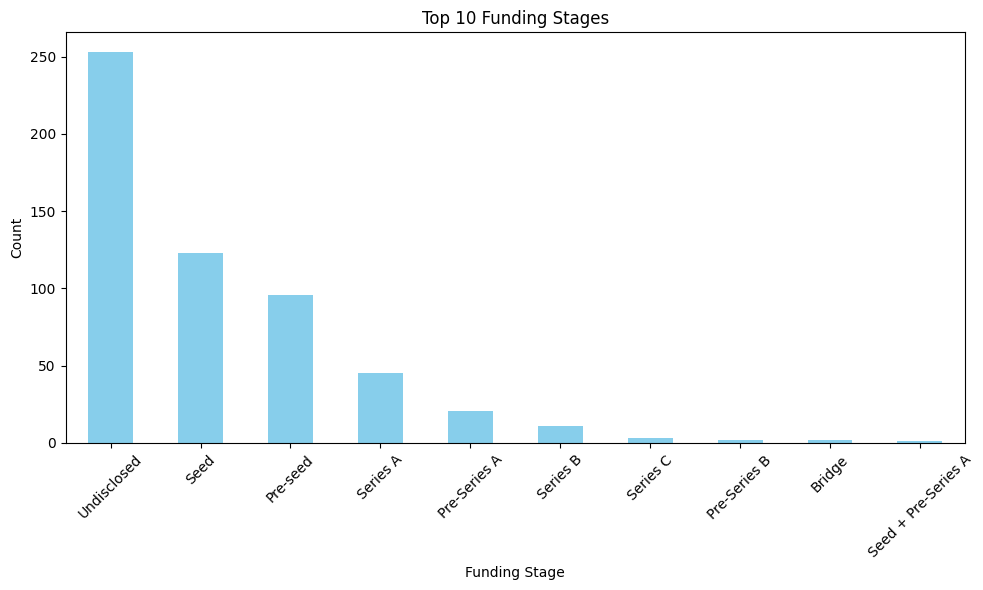

In [43]:
subset_df['Stage'] = subset_df['Stage'].str.strip()  # Remove leading/trailing spaces
subset_df['Stage'] = subset_df['Stage'].str.replace('Undisclosed.*', 'Undisclosed', regex=True)  # Group Undisclosed stages
subset_df['Stage'] = subset_df['Stage'].str.replace('Series A.*', 'Series A', regex=True)  # Group Series A stages

top_10_stages = subset_df['Stage'].value_counts().head(10)

# Create a bar chart to visualize the top 10 funding stages
plt.figure(figsize=(10, 6))
top_10_stages.plot(kind='bar', color='skyblue')
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.title('Top 10 Funding Stages')
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

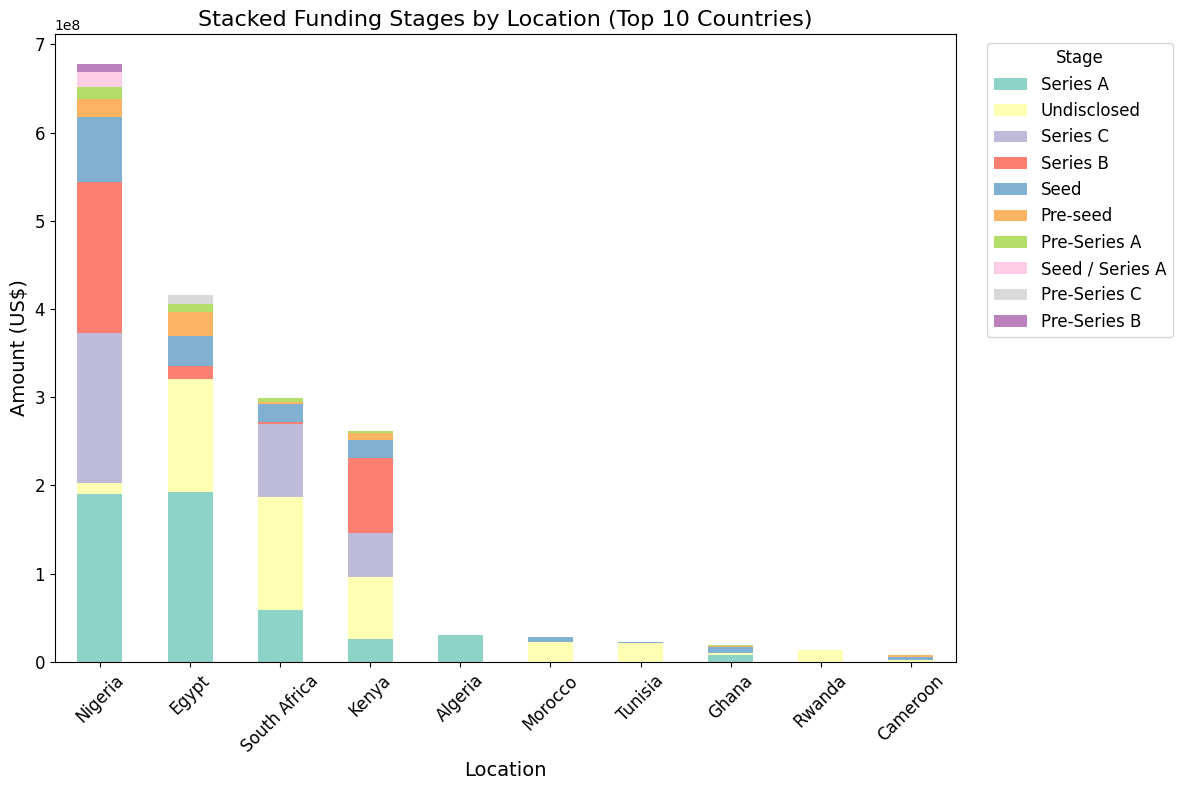

In [ ]:
# Group and pivot the data for a stacked bar chart
pivot_df = subset_df.pivot_table(index='Location', columns='Stage', values='Amount (US$)', aggfunc='sum', fill_value=0)

# Calculate the total funding amount for each location
pivot_df['Total Amount'] = pivot_df.sum(axis=1)

# Select the top ten countries based on total funding amount
top_10_countries = pivot_df.nlargest(10, 'Total Amount').index

# Filter the DataFrame to include only the top ten countries
pivot_df = pivot_df.loc[top_10_countries]

# Remove the 'Total Amount' column
pivot_df.drop(columns=['Total Amount'], inplace=True)

# Select the top 10 Funding Stages
top_10_stages = pivot_df.sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 stages
pivot_df = pivot_df[top_10_stages]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("Set3", len(top_10_stages))  # Set custom colors for stages

pivot_df.plot(kind='bar', stacked=True, color=colors, ax=ax)  # Specify ax=ax to use the same axis

plt.xlabel('Location', fontsize=14)
plt.ylabel('Amount (US$)', fontsize=14)
plt.title('Stacked Funding Stages by Location (Top 10 Countries)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Stage', loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=12, title_fontsize=12)  # Move legend to the side
plt.grid(False)  # Remove grid lines

# Display the chart
plt.tight_layout()
plt.show()

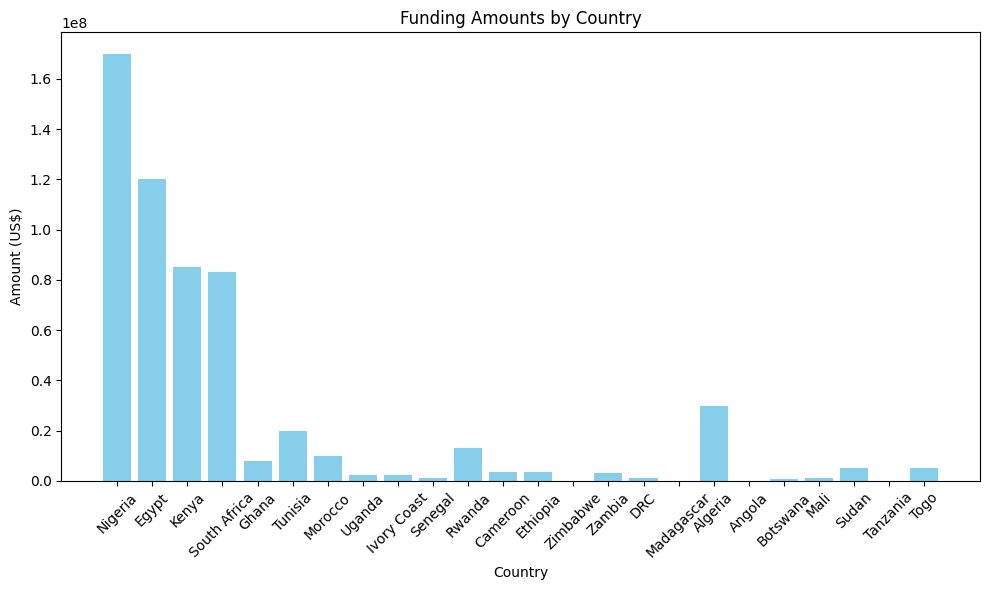

In [48]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(subset_df['Location'], subset_df['Amount (US$)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Amount (US$)')
plt.title('Funding Amounts by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()

The insight I get from the image is that Launch Africa Ventures is the most active investor in African startups, followed by Kepple Africa Ventures and Flat6Labs. These three investors have all made at least 10 investments in African startups, and their combined investments total over $100 million.

This suggests that these investors are bullish on the African startup ecosystem and believe that there are many opportunities for growth and investment. It is also worth noting that these investors are all based in Africa, which indicates that there is a growing pool of capital available for African startups.

The other investors in the graph are also active in the African startup ecosystem, but they have made fewer investments than the top three. This suggests that there are many other investors who are interested in investing in African startups, but they are still in the early stages of their investment activity.

Overall, the image shows that there is a growing interest in investing in African startups. This is a positive development for the African economy, as it can help to create jobs and drive economic growth

C:\Users\user\AppData\Local\Temp\ipykernel_37204\3025543196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Intnl founder?'] = subset_df['Intnl founder?'].str.strip().str.lower()


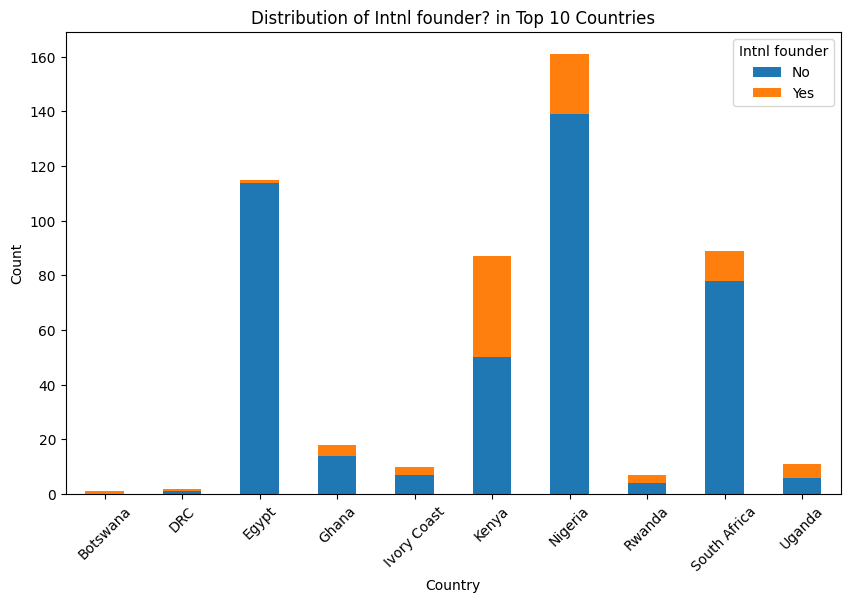

In [49]:
# Clean and standardize the 'female co-founderCEO (Yes or No)' column
subset_df['Intnl founder?'] = subset_df['Intnl founder?'].str.strip().str.lower()

# Group the data by 'country' and count the occurrences of 'yes' and 'no' for female co-founderCEO
grouped_data = subset_df.groupby(['Location', 'Intnl founder?']).size().unstack().fillna(0)

top_10_countries = grouped_data['yes'].nlargest(10)

# Filter the original DataFrame (subset_df) to include only the top 10 countries
top_10_df = subset_df[subset_df['Location'].isin(top_10_countries.index)]

# Group the data by 'Location' and count the occurrences of 'Yes' and 'No' for female co-founderCEO
grouped_data_top_10 = top_10_df.groupby(['Location', 'Intnl founder?']).size().unstack().fillna(0)

# Plot a stacked bar chart for the top 10 countries
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data_top_10.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of Intnl founder? in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Intnl founder', labels=['No', 'Yes'])
plt.show()

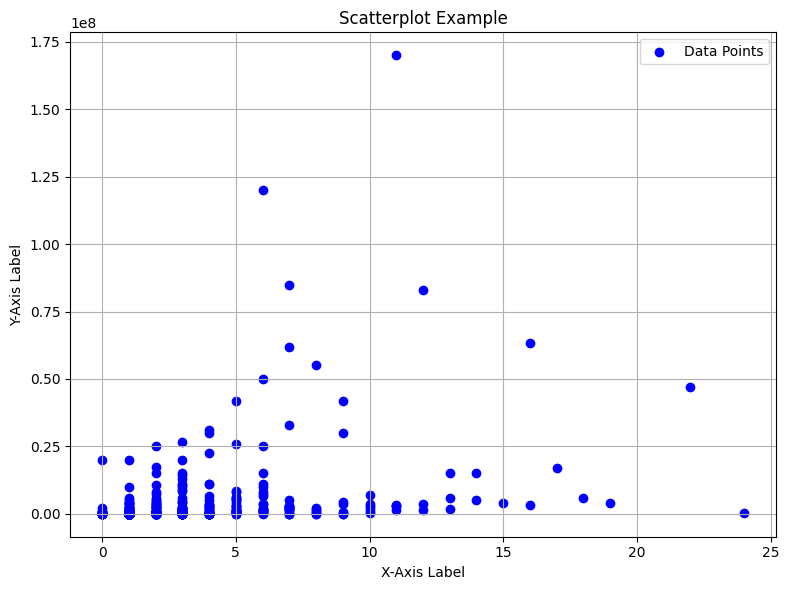

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(subset_df['Investors_no'], subset_df['Amount (US$)'], c='blue', marker='o', label='Data Points')
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Scatterplot Example')
plt.legend()  # Display legend if you have multiple datasets

# Display the scatterplot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()
plt.show()

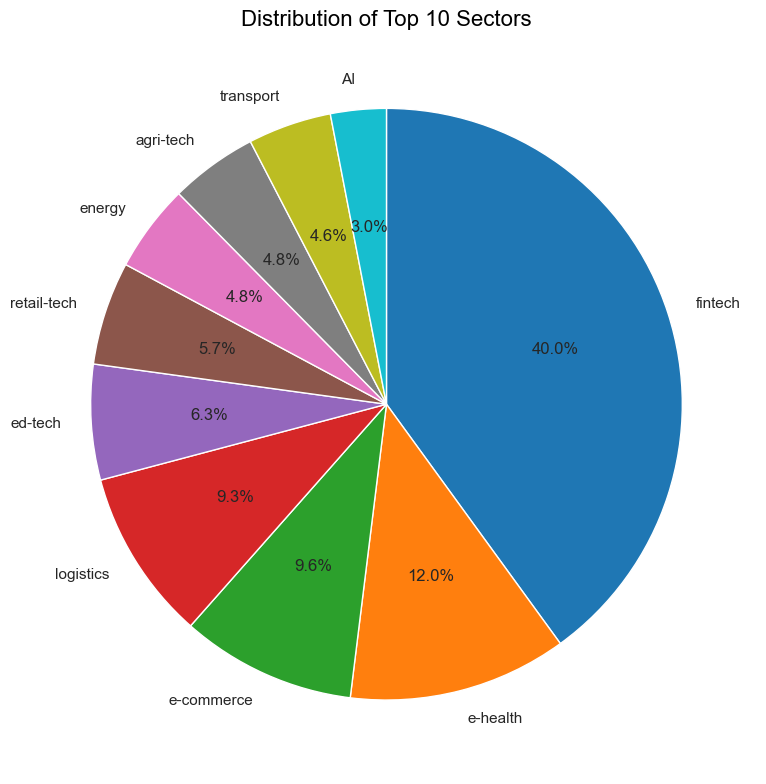

In [51]:
import seaborn as sns

# Count the occurrences of each sector
sector_counts = subset_df['Sector'].value_counts()

# Select the top 10 sectors
top_10_sectors = sector_counts.head(10)

# Create a pie chart for the top 10 sectors using Seaborn
plt.figure(figsize=(8, 8))
plt.title('Distribution of Top 10 Sectors', fontsize=16)
sns.set_palette('pastel')  # Set a pastel color palette
sns.set(style='whitegrid')  # Set a white grid background
plt.pie(top_10_sectors, labels=top_10_sectors.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# Display the chart
plt.tight_layout()
plt.show()

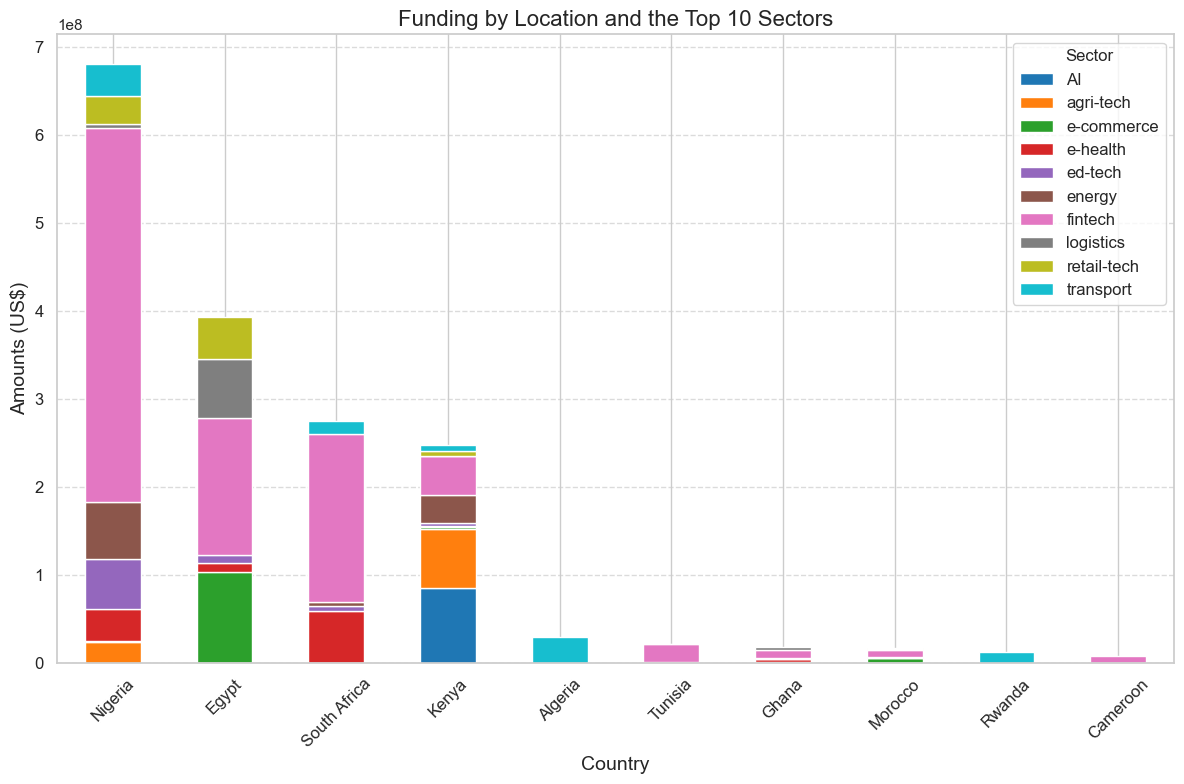

In [52]:
# Group and sum the data by sector
sector_totals = subset_df.groupby('Sector')['Amount (US$)'].sum().sort_values(ascending=False)

# Select the top 10 sectors
top_10_sectors = sector_totals.head(10)

# Filter the original DataFrame to include only the top 10 sectors
filtered_df = subset_df[subset_df['Sector'].isin(top_10_sectors.index)]

# Pivot the DataFrame to prepare it for the stacked bar chart
pivot_df = filtered_df.pivot_table(index='Location', columns='Sector', values='Amount (US$)', aggfunc='sum').fillna(0)

# Select the top 10 locations based on the total amount (US$) in descending order
top_10_locations = pivot_df.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter the pivot_df to include only the top 10 locations
pivot_df = pivot_df.loc[top_10_locations]

# Create a stacked bar chart with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customize the chart
plt.xlabel('Country', fontsize=14)
plt.ylabel('Amounts (US$)', fontsize=14)
plt.title('Funding by Location and the Top 10 Sectors', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sector', loc='upper right', fontsize=12, title_fontsize=12)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart with a tight layout
plt.tight_layout()
plt.show()

The insight I get from the image is that Nigeria, Egypt, South Africa, and Kenya are the leading countries in terms of funding for startups in Africa. These four countries collectively account for over 80% of the total funding for African startups.

This suggests that these countries have the most developed startup ecosystems in Africa. They also have the largest populations and economies, which provides a large market for startups to tap into.

The other countries in the graph are also receiving funding for startups, but at a much lower level. This suggests that these countries are still in the early stages of developing their startup ecosystems.

The top 10 sectors for funding in Africa are agri-tech, e-commerce, e-health, ed-tech, energy, fintech, logistics, retail-tech, transport, and others. These sectors are all important to the African economy and have the potential to be disrupted by technology.

The image shows that there is a growing interest in funding startups in Africa. This is a positive development for the African economy, as it can help to create jobs and drive economic growth.

## TASK 2: Do women-led startups get much less funding than men?

## TASK 3:Which sector is funded the most?

## TASK 4:What is the average age of these startups?

## TASK 5:Do accelerators increase the chances of funding and the amount?

## TASK 6:Which investors spends the most amount of money in Africa?
#### this can be broken down into country and  regions